# 2 . Utilizando a base disponível no ​ [link](https://archive.ics.uci.edu/ml/datasets/Avila), crie os datasets a seguir:

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


Elabore uma rede neural de duas camadas para classificação do banco de
dados.
Ao fim do treinamento, avalie o desempenho da rede utilizando a matriz de
confusão com o dataset de teste e mostre o valor de acurácia.
Observações:

● Utilize apenas o arquivo ​ avila-tr.txt​ .

● A camada de saída da rede deverá conter um neurônio para cada classe.

● Utilize o dataset de validação para criar algum critério de parada no
treinamento.

Bônus: defina uma arquitetura de rede neural ou modelos de ​ deep learning que
ultrapassem 75% de acurácia.

### DATA SET DESCRIPTION 
The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

### Class distribution (training set)
* A: 4286
* B: 5  
* C: 103 
* D: 352 
* E: 1095 
* F: 1961 
* G: 446 
* H: 519
* I: 831
* W: 44
* X: 522 
* Y: 266

### ATTRIBUTE DESCRIPTION
|ID|      Name    |
|-|-|
|F1|       intercolumnar distance |
|F2|       upper margin |
|F3|       lower margin |
|F4|       exploitation |
|F5|       row number |
|F6|      modular ratio |
|F7|       interlinear spacing |
|F8|       weight |
|F9|       peak number |
|F10|     modular ratio/ interlinear spacing|
Class: A, B, C, D, E, F, G, H, I, W, X, Y


CITATIONS
If you want to refer to the Avila data set in a publication, please cite the following paper:

C. De Stefano, M. Maniaci, F. Fontanella, A. Scotto di Freca,
Reliable writer identification in medieval manuscripts through page layout features: The "Avila" Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110.


In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [43]:
import pandas as pd

In [9]:
dataset = pd.read_csv('./avila/avila-tr.txt', header = None)

In [10]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [11]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


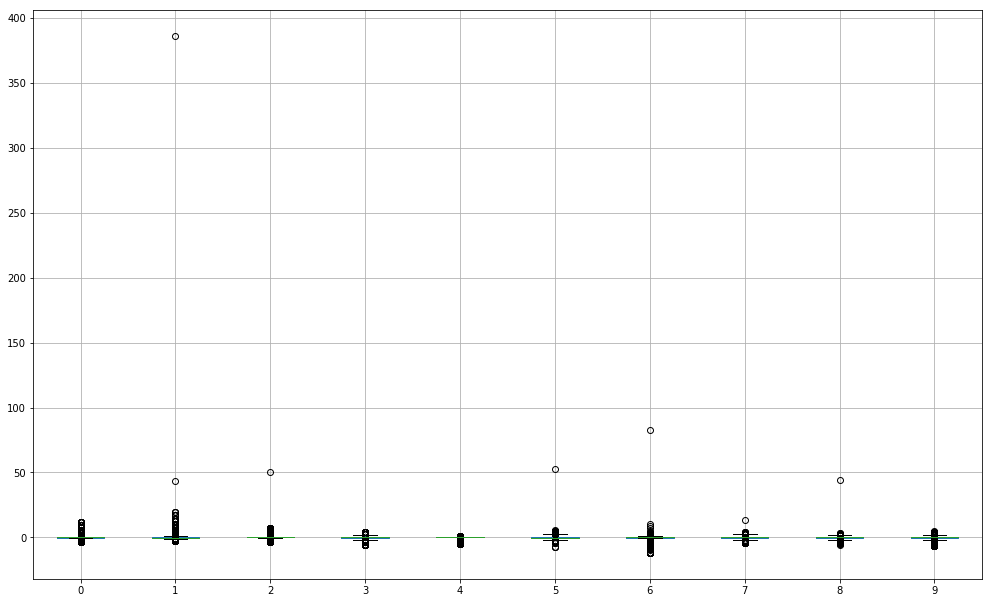

In [12]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

dataset.boxplot()

# Percebendo o _outlier_ na coluna 1

In [17]:
a = dataset.loc[dataset[1] == 386]

In [20]:
a

,0,1,2,3,4,5,6,7,8,9,10
6619,0.0,386.0,50.0,0.168104,0.0,53.0,83.0,0.275032,44.0,0.63802,A


In [24]:
aux = np.array(dataset[1])
dataset[1] = dataset[1].replace(386, np.nanmedian(aux))

In [25]:
dataset.loc[dataset[1] == 386]

,0,1,2,3,4,5,6,7,8,9,10


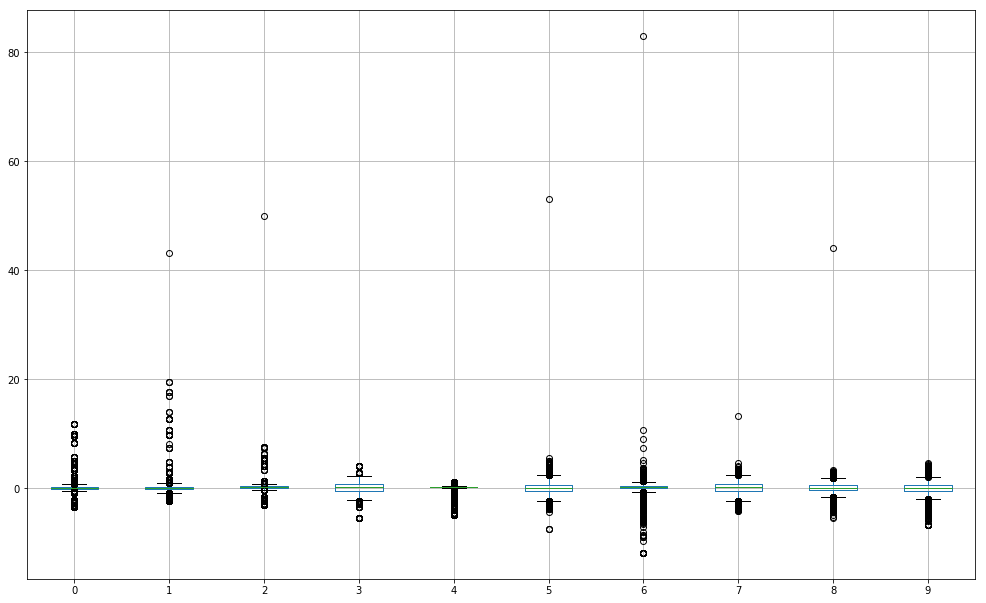

In [27]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [28]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.003403,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,1.042894,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,43.133656,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [29]:
b = np.array(dataset[6])

In [30]:
b


array([ 0.371178,  1.46594 , -0.081827, ...,  0.295677,  0.069175,
        0.786433])

In [31]:
np.max(b)

83.0

In [32]:
for i in [1, 2, 5, 6, 7, 8]:
    aux = np.array(dataset[i])
    dataset[i] = dataset[i].replace(np.max(aux), np.nanmedian(aux))

In [33]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.007544,-0.005298,-0.002387,0.006370,0.008886,-0.002331,0.009070,0.008702,0.000818
std,0.991431,0.953512,1.007528,1.008527,0.992053,0.999600,1.032191,0.995195,0.998735,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111778,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654886,0.500624,0.530855
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
#del(plt)
import matplotlib.pyplot as plt
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
#dataset.plot()
plt.boxplot()

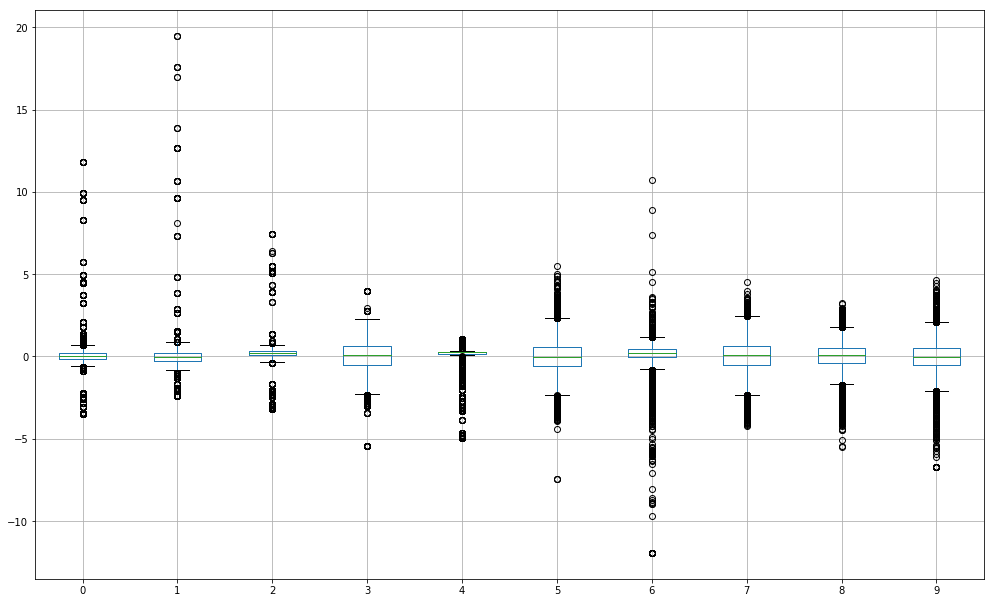

In [42]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

# Mudando a classe de caractere para inteiro

In [56]:
dictionary_classes = {}

In [59]:
ord("A")

65

In [60]:
classes_number = [i for i in range(12)]

In [61]:
classes_number

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [62]:
classes_charcteres = ["A","B","C","D","E","F","G","H","I","W","X","Y"]

In [63]:
for num, char in zip(classes_number, classes_charcteres):
    dictionary_classes[char] = num

In [64]:
dictionary_classes

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'W': 9,
 'X': 10,
 'Y': 11}

In [66]:
dataset[10].head(5)

0    A
1    A
2    A
3    A
4    F
Name: 10, dtype: object

In [75]:
for key in dictionary_classes:
    print(key, dictionary_classes[key])
    dataset[10] = dataset[10].replace(key, dictionary_classes[key])

A 0
B 1
C 2
D 3
E 4
F 5
G 6
H 7
I 8
W 9
X 10
Y 11


Testando se realmente funcionou

In [76]:
dataset[10].head()

0    0
1    0
2    0
3    0
4    5
Name: 10, dtype: int64

In [77]:
dataset[10].tail()

10425     5
10426     5
10427     0
10428     4
10429    10
Name: 10, dtype: int64

# Usando Keras

Keras é uma API de alto nível para o tensorflow, que permite criar redes neurais complexas sem precisar entender as variáveis que o Tensorflow possui

Primeiro é preciso particionar a base de acordo com as porcentagens abaixo

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


In [78]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values

Errado, pois a separação está diferente da tabela

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.6)

In [102]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate:")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)

Epoch 1/20
6258/6258 [==============================] - 1s 190us/step - loss: 2.1404 - acc: 0.3913
Epoch 2/20
6258/6258 [==============================] - 0s 31us/step - loss: 1.7803 - acc: 0.4156
Epoch 3/20
6258/6258 [==============================] - 0s 32us/step - loss: 1.6054 - acc: 0.4626
Epoch 4/20
6258/6258 [==============================] - 0s 34us/step - loss: 1.4955 - acc: 0.4853
Epoch 5/20
6258/6258 [==============================] - 0s 34us/step - loss: 1.4252 - acc: 0.5038
Epoch 6/20
6258/6258 [==============================] - 0s 35us/step - loss: 1.3867 - acc: 0.5187
Epoch 7/20
6258/6258 [==============================] - 0s 34us/step - loss: 1.3474 - acc: 0.5302
Epoch 8/20
6258/6258 [==============================] - 0s 40us/step - loss: 1.3313 - acc: 0.5372
Epoch 9/20
6258/6258 [==============================] - 0s 44us/step - loss: 1.2946 - acc: 0.5393
Epoch 10/20
6258/6258 [==============================] - 0s 47us/step - loss: 1.2892 - acc: 0.5425
Epoch 11/20
6258/6

[1.068211891792879, 0.60210930003873]

In [103]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(13, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)

Epoch 1/20
6258/6258 [==============================] - 1s 177us/step - loss: 2.5122 - acc: 0.2685
Epoch 2/20
6258/6258 [==============================] - 0s 33us/step - loss: 2.4552 - acc: 0.3694
Epoch 3/20
6258/6258 [==============================] - 0s 33us/step - loss: 2.4023 - acc: 0.3976
Epoch 4/20
6258/6258 [==============================] - 0s 32us/step - loss: 2.3513 - acc: 0.4070
Epoch 5/20
6258/6258 [==============================] - 0s 35us/step - loss: 2.2910 - acc: 0.4094
Epoch 6/20
6258/6258 [==============================] - 0s 31us/step - loss: 2.2477 - acc: 0.4089
Epoch 7/20
6258/6258 [==============================] - 0s 31us/step - loss: 2.2004 - acc: 0.4100
Epoch 8/20
6258/6258 [==============================] - 0s 32us/step - loss: 2.1608 - acc: 0.4104
Epoch 9/20
6258/6258 [==============================] - 0s 35us/step - loss: 2.1238 - acc: 0.4104
Epoch 10/20
6258/6258 [==============================] - 0s 32us/step - loss: 2.0944 - acc: 0.4102
Epoch 11/20
6258/6

[1.9055845237989781, 0.40795781405522974]